# Multivariate Descriptive
Descriptive statistics provide simple summaries of (large amounts of) information (or data). These summaries are quantitative (e.g. means, correlations) or displayed visually (in graphs, scatterplots, etc.).

## Lorenz curve

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
# To make a skewed dataset, I append two Poisson random samples together.
X = np.append(np.random.poisson(lam=10, size=40), 
              np.random.poisson(lam=100, size=10))
X

array([ 10,   9,  12,   9,   6,   8,   9,  12,  11,  13,   9,  15,   9,
        17,  14,  11,  16,   7,   9,  11,  11,   7,  14,  11,  10,   6,
        12,   6,   9,   4,   5,  15,  12,  14,   6,   8,   6,  15,  12,
        13,  99, 111,  79, 106,  88, 102, 100,  87, 116, 103])

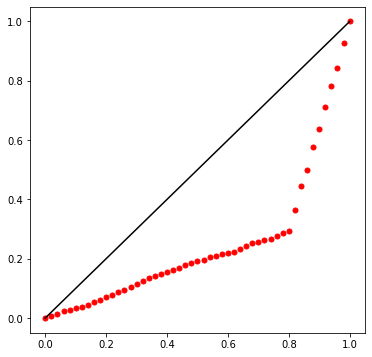

In [ ]:
def lorenz_curve(X):
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0) 
    fig, ax = plt.subplots(figsize=[6,6])
    ## scatter plot of Lorenz curve
    ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
               marker='.', color='r', s=100);
    ## line plot of equality
    ax.plot([0,1], [0,1], color='k')

lorenz_curve(X)

## Gini-Coefficient

In [ ]:
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*xi for i, xi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

gini(X)

0.5566381766381765

## Contingency table

### using crosstab</br>
pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False)

In [ ]:
import pandas as pd

In [ ]:
dd = pd.DataFrame([["no", "short", 86], ["no", "middel", 19], ["no", "long", 18],
                                 ["apprentice", "short", 170], ["apprentice", "middel", 43], ["apprentice", "long", 20],
                                 ["specialized", "short", 40], ["specialized", "middel", 11], ["specialized", "long",5], 
                                 ["academia", "short", 28], ["academia", "middel", 4], ["academia", "long", 3]],            
                 columns=["trained", "jobless", "number"])
dd

,trained,jobless,number
0,no,short,86
1,no,middel,19
2,no,long,18
3,apprentice,short,170
4,apprentice,middel,43
5,apprentice,long,20
6,specialized,short,40
7,specialized,middel,11
8,specialized,long,5
9,academia,short,28


In [ ]:
# unfourtunately pd.crosstab crosstab by default arrange the index and 
# columns in an ascending order & this order can’t be changed.
ct = pd.crosstab(index=dd.trained, columns=dd.jobless, values=dd.number, 
                           aggfunc="sum", margins=True, normalize="columns")         #   ‘columns’ -> sum by level of training
ct  

jobless,long,middel,short,All
trained,,,,
academia,0.065217,0.051948,0.086420,0.078300
apprentice,0.434783,0.558442,0.524691,0.521253
no,0.391304,0.246753,0.265432,0.275168
specialized,0.108696,0.142857,0.123457,0.125280


### heatmap

<Figure size 432x288 with 0 Axes>

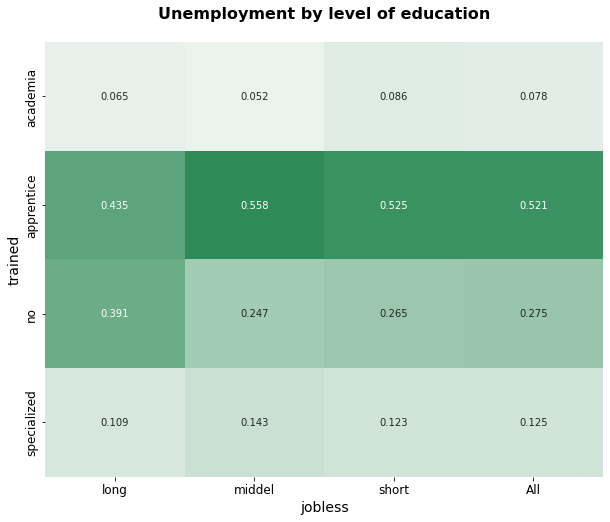

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.clf();                                     # Clear the current figure.

fig, ax = plt.subplots(figsize=(10, 8), facecolor="#FFFFFF"); # figure color
ax.set_aspect("auto");     # "equal", or float representing aspect ratio of y to x
plt.title("Unemployment by level of education", fontsize=16, y=1.04,  fontweight="bold")
ax.xaxis.label.set_fontsize(14)
ax.yaxis.label.set_fontsize(14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

cmap = sn.light_palette("seagreen", as_cmap=True);
res = sn.heatmap(ct, annot=True, fmt='.3f', cmap=cmap, cbar=False);

plt.savefig("crosstab.png", bbox_inches='tight', dpi=200);        # saves the graph
plt.show()

### selfmade crosstab
to impose the preferred order of row & columns one can create a selfmade crosstab

In [ ]:
df = pd.DataFrame(
{"short":[86, 170, 40, 28],
 "middel":[19, 43, 11, 4],
 "long":[18,20,5,3] },
index = ["no" ,"apprentice", "specialized", "academia"])
df

,short,middel,long
no,86,19,18
apprentice,170,43,20
specialized,40,11,5
academia,28,4,3


add margin of rows and columns

In [ ]:
#Total sum per row: 
df.loc[:, "sum"] = df.sum(axis=1)
#Total sum per column: 
df.loc['sum',:]= df.sum(axis=0)
df

,short,middel,long,sum
no,86.0,19.0,18.0,123.0
apprentice,170.0,43.0,20.0,233.0
specialized,40.0,11.0,5.0,56.0
academia,28.0,4.0,3.0,35.0
sum,324.0,77.0,46.0,447.0


### relative frequency

In [ ]:
rel = round(df/447, 4)  # divided by total, round to 4 figures

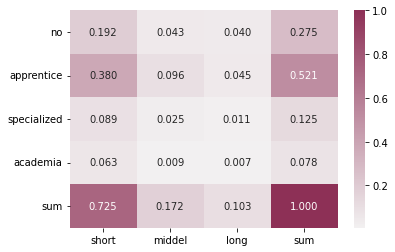

In [ ]:
# c = sn.light_palette((248,43,71), input="husl", as_cmap=True);
c = sn.light_palette("#8D3056", as_cmap=True)
res = sn.heatmap(rel, annot=True, fmt='.3f', cmap=c, cbar=True);